In [63]:
import numpy as np 
import os
import cv2
from tensorflow.keras.models import Sequential,save_model,load_model
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
DATADIR = r'C:\Users\malha\Desktop\ML\Mask Detector\Face Mask Dataset\Train'
CAT = ['Without Mask','With Mask']
#os.path.exists(DATADIR)

In [4]:
SIZE = 80
data = []

In [13]:
def impute_data():
    for category in CAT:
        path = os.path.join(DATADIR,category)
        label = CAT.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array,(SIZE,SIZE))
                data.append([img_array,label])
            except Exception as e:
                pass


In [8]:
impute_data()

In [9]:
len(data)

10000

In [10]:
random.shuffle(data)

In [11]:
X = []
y = []

def separate():
    for i in data:
        X.append(i[0])
        y.append(i[1])

In [14]:
separate()

In [15]:
X = np.array(X).reshape(-1,SIZE,SIZE,1)

In [16]:
X = X/255.0

In [19]:
y = np.array(y)

In [21]:
np.save('features.npy',X)
np.save('labels.npy',y)

In [5]:
X = np.load('features.npy')
y = np.load('labels.npy')

(10000,)

In [12]:
DATADIR = r'C:\Users\malha\Desktop\ML\Mask Detector\Face Mask Dataset\Test'
test_data = []

In [14]:
def impute_test_data():
    for category in CAT:
        path = os.path.join(DATADIR,category)
        label = CAT.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array,(SIZE,SIZE))
                test_data.append([img_array,label])
            except Exception as e:
                pass


In [15]:
impute_test_data()

In [19]:
test_data[128][1]

0

In [20]:
random.shuffle(test_data)

In [24]:
X_test = []
y_test = []

def test_separate():
    for i in test_data:
        X_test.append(i[0])
        y_test.append(i[1])

In [25]:
test_separate()

In [38]:
X_test = np.array(X_test).reshape(-1,SIZE,SIZE,1)

In [40]:
X_test = X_test/255.0

In [41]:
y_test = np.array(y_test)

In [88]:
np.save('features_test.npy',X_test)
np.save('labels_test.npy',y_test)

In [42]:
X_test.shape

(992, 80, 80, 1)

In [43]:
X = np.load('features.npy')
y = np.load('labels.npy')

In [46]:
X_test.shape

(992, 80, 80, 1)

In [51]:
#MAKING CNN
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])



In [52]:
early_stopping = EarlyStopping(monitor='val_loss',mode='min',patience=3)

In [53]:
model.fit(x=X,y=y,
    epochs=10,validation_data=[X_test,y_test],
    callbacks=[early_stopping])

Train on 10000 samples, validate on 992 samples
Epoch 1/10
10000/10000 [==============================] - 47s 5ms/sample - loss: 0.2557 - accuracy: 0.8842 - val_loss: 0.0733 - val_accuracy: 0.9698
Epoch 2/10
10000/10000 [==============================] - 50s 5ms/sample - loss: 0.1059 - accuracy: 0.9663 - val_loss: 0.0712 - val_accuracy: 0.9758
Epoch 3/10
10000/10000 [==============================] - 50s 5ms/sample - loss: 0.0845 - accuracy: 0.9728 - val_loss: 0.0524 - val_accuracy: 0.9758
Epoch 4/10
10000/10000 [==============================] - 51s 5ms/sample - loss: 0.0631 - accuracy: 0.9798 - val_loss: 0.0584 - val_accuracy: 0.9758
Epoch 5/10
10000/10000 [==============================] - 51s 5ms/sample - loss: 0.0515 - accuracy: 0.9829 - val_loss: 0.0653 - val_accuracy: 0.9758
Epoch 6/10
10000/10000 [==============================] - 52s 5ms/sample - loss: 0.0477 - accuracy: 0.9839 - val_loss: 0.0336 - val_accuracy: 0.9819
Epoch 7/10
10000/10000 [==============================] - 

<Figure size 8000x8000 with 0 Axes>

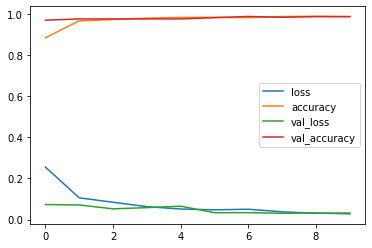

In [71]:
plt.figure(figsize=(10,10),dpi=800)
pd.DataFrame(model.history.history).plot()


In [72]:
model.evaluate(X_test,y_test)
#1ms per sample

992/992 [==============================] - 1s 1ms/sample - loss: 0.0278 - accuracy: 0.9869


[0.027769554041198366, 0.98689514]

In [87]:
DATADIR = r'C:\Users\malha\Desktop\ML\Mask Detector\Face Mask Dataset\Validation'
validation_data = []


def impute_validation_data():
    for category in CAT:
        path = os.path.join(DATADIR,category)
        label = CAT.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array,(SIZE,SIZE))
                validation_data.append([img_array,label])
            except Exception as e:
                pass





In [92]:
impute_validation_data()

In [94]:
X_validation = []
y_validation = []

for i in validation_data:
    X_validation.append(i[0])
    y_validation.append(i[1])


In [97]:
X_validation = np.array(X_validation).reshape(-1,SIZE,SIZE,1)
X_validation = X_validation/255.0

In [98]:
y_validation = np.array(y_validation)

In [99]:
model.evaluate(X_validation,y_validation)

800/800 [==============================] - 1s 1ms/sample - loss: 0.0282 - accuracy: 0.9875


[0.028228099095867945, 0.9875]

In [100]:
from sklearn.metrics import classification_report,confusion_matrix

In [104]:
#TEST DATA
testdataeval = pd.DataFrame(model.predict_classes(X_test),columns=['Predicted'])

In [110]:
testdataeval['True'] = pd.DataFrame(y_test.reshape(992,1),columns=['True'])['True']

In [112]:
print(confusion_matrix(testdataeval['True'],testdataeval['Predicted']))

[[506   3]
 [ 10 473]]


In [113]:
print(classification_report(testdataeval['True'],testdataeval['Predicted']))

precision    recall  f1-score   support

           0       0.98      0.99      0.99       509
           1       0.99      0.98      0.99       483

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992



In [115]:
model.save('model.tf')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model.tf\assets


In [122]:
#VALIDATION DATA
validationdataeval = pd.DataFrame(model.predict_classes(X_validation),columns=['Predicted'])
validationdataeval['True'] = pd.DataFrame(y_validation.reshape(y_validation.shape[0],1),columns=['True'])['True']

In [124]:
print(confusion_matrix(validationdataeval['Predicted'],validationdataeval['True']))

[[396   6]
 [  4 394]]


In [125]:
print(classification_report(validationdataeval['Predicted'],validationdataeval['True']))

precision    recall  f1-score   support

           0       0.99      0.99      0.99       402
           1       0.98      0.99      0.99       398

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

